In [5]:
import cv2
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import sklearn
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Tranforms

The transforms are used to alter and manipulate the image. This alters the images so that the images are loaded in the same size if they are different. 

In [36]:
transform = transforms.Compose(
                   [transforms.Resize((32,32)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Train_set is the dataset which will contain the images. The dataset is loaded in batches of 32 to dataloader.
Test_set will have the test data.

In [37]:
train_set = datasets.ImageFolder("training", transform=transform, target_transform=None, 
                                 is_valid_file=None)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=20, shuffle=True)


test_set = datasets.ImageFolder("test", transform=transform, target_transform=None, 
                                 is_valid_file=None)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=20, shuffle=True)

In [38]:
classes=('Apple Crimson Snow','Apple Red','Banana', 'Lemon', 'Orange')

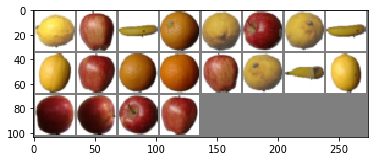

Lemon, Apple Red, Banana, Orange, Lemon, Apple Red, Lemon, Banana, Lemon, Apple Red, Orange, Orange, Apple Red, Lemon, Banana, Lemon, Apple Crimson Snow, Apple Crimson Snow, Apple Red, Apple Red


In [58]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(', '.join('%5s' % classes[labels[j]] for j in range(20)))

In [59]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(11520, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 11520)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [60]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [61]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0
print('Finished Training')

ValueError: Expected input batch_size (1) to match target batch_size (20).